General imports that I always put at the top of a notebook.

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import rdkit
print(rdkit.__version__)

2022.09.5


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('tableau-colorblind10')

# Getting started: the RDKit and the Notebook

If you have a molecule as the last line of a notebook cell, it will be displayed:

# Working with SMILES files

Here we're working with a set of Ki data on various carbonic anhydrase subforms that I exported from ChEMBL

In [14]:
import gzip
inf = gzip.open('./data/Ki_data/target_CHEMBL205.csv.gz','rt')
data = inf.readlines()
data[:3]

['compound_chembl_id,canonical_smiles,pchembl_value,standard_value,standard_units,standard_relation,standard_type\n',
 'CHEMBL1054,NS(=O)(=O)c1cc2c(cc1Cl)NC(C(Cl)Cl)NS2(=O)=O,7.04,91.0,nM,=,Ki\n',
 'CHEMBL1055,NS(=O)(=O)c1cc(C2(O)NC(=O)c3ccccc32)ccc1Cl,6.86,138.0,nM,=,Ki\n']

## Approach 1: read in the lines and construct the molecules yourself:

# Exercises

## SMILES

Generate the SMILES for the following molecules and check that they are correct:

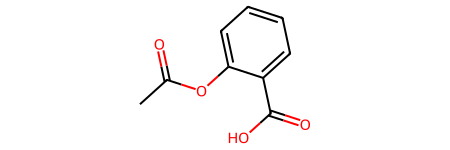

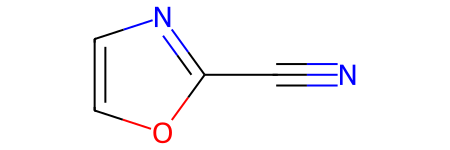

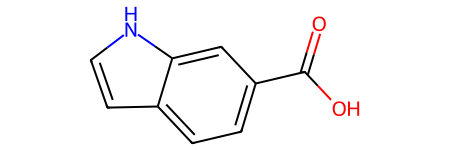


## Merging data files

In [15]:
from rdkit.Chem import PandasTools

In [16]:
c_anhydrase_I = pd.read_csv('./data/Ki_data/target_CHEMBL261.csv.gz')
c_anhydrase_II = pd.read_csv('./data/Ki_data/target_CHEMBL205.csv.gz')


In [24]:
PandasTools.AddMoleculeColumnToFrame(c_anhydrase_I,'canonical_smiles')
PandasTools.AddMoleculeColumnToFrame(c_anhydrase_II,'canonical_smiles')
PandasTools.RenderImagesInAllDataFrames()

,compound_chembl_id,canonical_smiles,pchembl_value,standard_value,standard_units,standard_relation,standard_type,ROMol
0,CHEMBL1054,NS(=O)(=O)c1cc2c(cc1Cl)NC(C(Cl)Cl)NS2(=O)=O,6.46,345.0,nM,=,Ki,
1,CHEMBL1055,NS(=O)(=O)c1cc(C2(O)NC(=O)c3ccccc32)ccc1Cl,6.46,348.0,nM,=,Ki,
2,CHEMBL107217,CCN(CC)C(=S)[S-].[Na+],6.10,790.0,nM,=,Ki,
3,CHEMBL1081233,CCCCC(CC)C(N)=O,5.19,6480.0,nM,=,Ki,
4,CHEMBL1082898,CCC(CC)C(=O)NCCc1ccc(S(N)(=O)=O)cc1,6.39,407.0,nM,=,Ki,

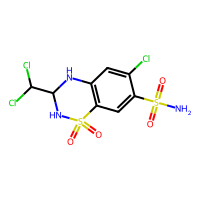
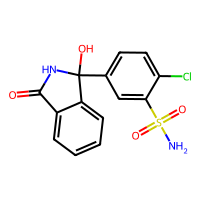
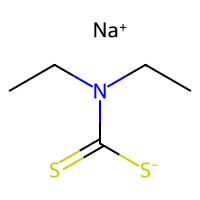
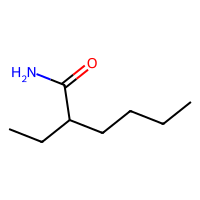
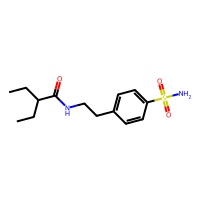

In [25]:
c_anhydrase_I.head()

In [28]:
filtered = pd.merge(c_anhydrase_I,c_anhydrase_II[['compound_chembl_id','pchembl_value']],on='compound_chembl_id')
len(c_anhydrase_I),len(c_anhydrase_II),len(filtered)

(4267, 4511, 4034)

,compound_chembl_id,canonical_smiles,pchembl_value_x,standard_value,standard_units,standard_relation,standard_type,ROMol,pchembl_value_y
0,CHEMBL1054,NS(=O)(=O)c1cc2c(cc1Cl)NC(C(Cl)Cl)NS2(=O)=O,6.46,345.0,nM,=,Ki,,7.04
1,CHEMBL1055,NS(=O)(=O)c1cc(C2(O)NC(=O)c3ccccc32)ccc1Cl,6.46,348.0,nM,=,Ki,,6.86
2,CHEMBL107217,CCN(CC)C(=S)[S-].[Na+],6.10,790.0,nM,=,Ki,,5.51

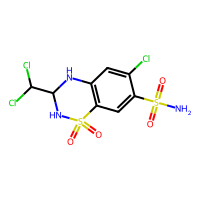
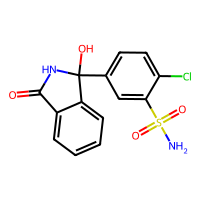
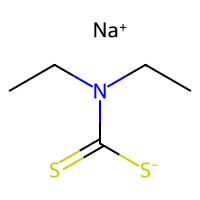

In [30]:
filtered.head(3)

,compound_chembl_id,canonical_smiles,pchembl_CAI,standard_value,standard_units,standard_relation,standard_type,ROMol,pchembl_CAII
0,CHEMBL1054,NS(=O)(=O)c1cc2c(cc1Cl)NC(C(Cl)Cl)NS2(=O)=O,6.46,345.0,nM,=,Ki,,7.04
1,CHEMBL1055,NS(=O)(=O)c1cc(C2(O)NC(=O)c3ccccc32)ccc1Cl,6.46,348.0,nM,=,Ki,,6.86
2,CHEMBL107217,CCN(CC)C(=S)[S-].[Na+],6.10,790.0,nM,=,Ki,,5.51

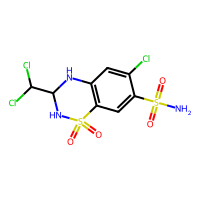
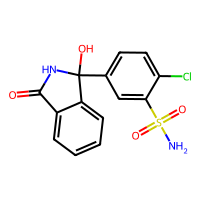
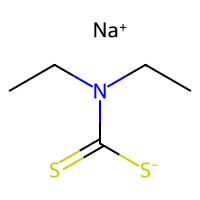

In [32]:
filtered.rename(columns={'pchembl_value_x':'pchembl_CAI','pchembl_value_y':'pchembl_CAII'},inplace=True)
filtered.head(3)

Now repeat that for Carbonic Anhydrases IX (CHEMBL3594) and XII (CHEMBL3242).

How many compounds do we have Ki values for all four targets for?

In [33]:
c_anhydrase_IX = pd.read_csv('./data/Ki_data/target_CHEMBL3594.csv.gz')
c_anhydrase_XII = pd.read_csv('./data/Ki_data/target_CHEMBL3242.csv.gz')
PandasTools.AddMoleculeColumnToFrame(c_anhydrase_IX,'canonical_smiles')
PandasTools.AddMoleculeColumnToFrame(c_anhydrase_XII,'canonical_smiles')
PandasTools.RenderImagesInAllDataFrames()

In [34]:
filtered = pd.merge(filtered,c_anhydrase_IX[['compound_chembl_id','pchembl_value']],on='compound_chembl_id')
len(c_anhydrase_IX),len(filtered)

(4220, 3075)

In [35]:
filtered = pd.merge(filtered,c_anhydrase_XII[['compound_chembl_id','pchembl_value']],on='compound_chembl_id')
len(c_anhydrase_XII),len(filtered)

(3398, 2249)